In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Read the CSV file into a DataFrame with a different encoding
df = pd.read_csv('UpdatedDataset.csv', encoding='latin1')
df = df.drop(columns=['Country','Intend to apply for financial aid','Visa_Type_Category','Application Program','Race', 'Decisions Released Date'])
# Remove the time component and keep only the date
df['Record Created Date'] = pd.to_datetime(df['Record Created Date'])
df['Application Created Date'] = pd.to_datetime(df['Application Created Date'])
#df['Decisions Released Date'] = pd.to_datetime(df['Decisions Released Date'])
df['Rec_year'] = df['Record Created Date'].dt.year
df['App_year'] = df['Application Created Date'].dt.year
#df['Dec_year'] = df['Decisions Released Date'].dt.year
categorical_columns = ['Application Referral Source', 'Application Status', 'Program_Category', 'Region', 'GPA_Category', 'Race_Category','Application Start Term', 'Sex', 'Decision Reason', 'Visa Type New','Scholarship_Category']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Exclude date columns from conversion
cont_columns = ['Rec_year', 'Application Created Date', 'Age','Applications Registered in Colleague','App_year' ]
for col in df.columns:
  if col not in cont_columns:
     df[col] = df[col].astype(int)
program_category_columns = [col for col in df.columns if col.startswith('Program_Category_')]
print(program_category_columns)
df = df.drop(columns=['Unnamed: 0'])


/var/folders/gw/1hbycv6d5hdbrwt0xn0wt2600000gn/T/ipykernel_9815/3068711528.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Record Created Date'] = pd.to_datetime(df['Record Created Date'])
/var/folders/gw/1hbycv6d5hdbrwt0xn0wt2600000gn/T/ipykernel_9815/3068711528.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Application Created Date'] = pd.to_datetime(df['Application Created Date'])


['Program_Category_Accounting and Analytics - MS', 'Program_Category_Business Administration (Professional) - MBA', 'Program_Category_Business Analytics - MSBA', 'Program_Category_Certificates', 'Program_Category_Finance - MSF', 'Program_Category_Other MBA', 'Program_Category_Sport and Entertainment Management - MBA']


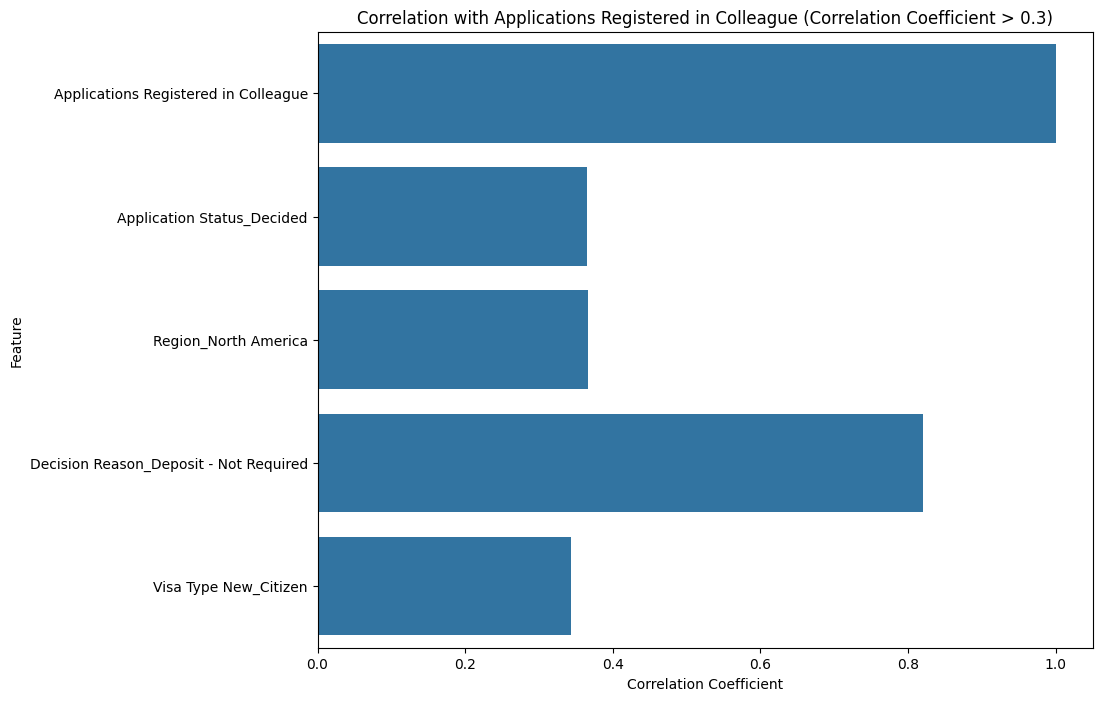

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_with_target = df.corr()['Applications Registered in Colleague']
# Filter variables with correlation coefficient greater than 0.3
filtered_correlation = correlation_with_target[correlation_with_target > 0.3]

# Plot the filtered correlation
plt.figure(figsize=(10, 8))
sns.barplot(x=filtered_correlation.values, y=filtered_correlation.index)
plt.title('Correlation with Applications Registered in Colleague (Correlation Coefficient > 0.3)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

In [42]:
correlation_matrix =df[cont_columns].corr()
correlation_matrix


,Rec_year,Application Created Date,Age,Applications Registered in Colleague,App_year
Rec_year,1.000000,0.939240,-0.250356,-0.168293,0.952565
Application Created Date,0.939240,1.000000,-0.240907,-0.151622,0.981641
Age,-0.250356,-0.240907,1.000000,0.145764,-0.239771
Applications Registered in Colleague,-0.168293,-0.151622,0.145764,1.000000,-0.151822
App_year,0.952565,0.981641,-0.239771,-0.151822,1.000000


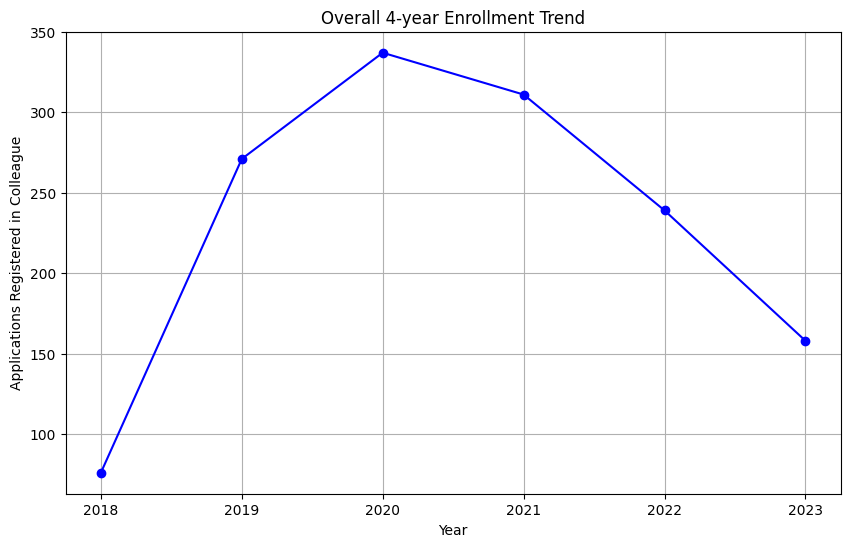

Predicted Enrollment for the Next Two Years:
2024    260.800000
2025    269.028571
dtype: float64


In [59]:

# 4-year enrollment trend
target_variable='Applications Registered in Colleague'
filtered_df = df[df['Rec_year'] <= 2023]
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('Overall 4-year Enrollment Trend')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)
plt.show()

# Prediction for the next two years (using a simple linear trend model)
from sklearn.linear_model import LinearRegression

X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)

#Question 2: What do you predict the next two years to look like?
next_two_years = pd.Series(model.predict([[2024], [2025]]), index=[2024, 2025])
print("Predicted Enrollment for the Next Two Years:")
print(next_two_years)


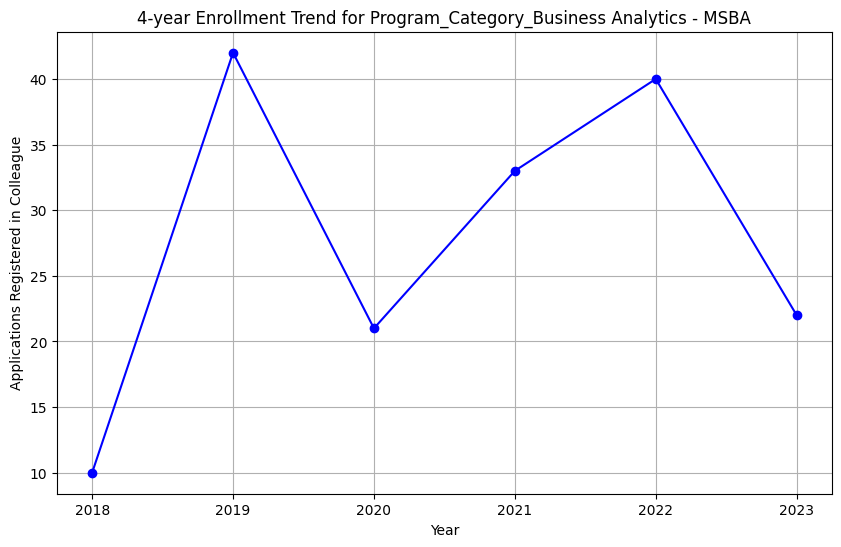

Predicted Enrollment for the Next Two Years:
2024    34.600000
2025    36.485714
dtype: float64


In [60]:
#Question 1: What is the 4-year enrollment trend and how has it shifted? Program wise
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data based on dummy column 'x'
filtered_df = df[(df['Program_Category_Business Analytics - MSBA'] == 1) & (df['Rec_year'] <= 2023)]

# Define the target variable
target_variable = 'Applications Registered in Colleague'

# 4-year enrollment trend
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('4-year Enrollment Trend for Program_Category_Business Analytics - MSBA')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)
plt.show()

# Prediction for the next two years (using a simple linear trend model)
X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)

# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025]]), index=[2024, 2025])
print("Predicted Enrollment for the Next Two Years:")
print(next_two_years)



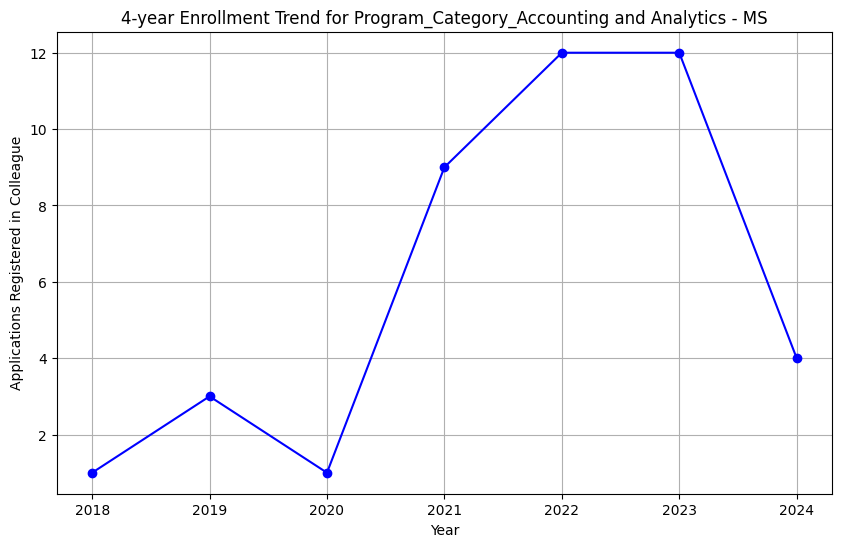

Predicted Enrollment for the Next Two Years:
2024    10.071429
2025    11.428571
dtype: float64


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data based on dummy column 'x'
filtered_df = df[df['Program_Category_Accounting and Analytics - MS'] == 1 & (df['Rec_year'] <= 2023)]

# Define the target variable
target_variable = 'Applications Registered in Colleague'

# 4-year enrollment trend
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('4-year Enrollment Trend for Program_Category_Accounting and Analytics - MS')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)
plt.show()

# Prediction for the next two years (using a simple linear trend model)
X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)

# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025]]), index=[2024, 2025])
print("Predicted Enrollment for the Next Two Years:")
print(next_two_years)

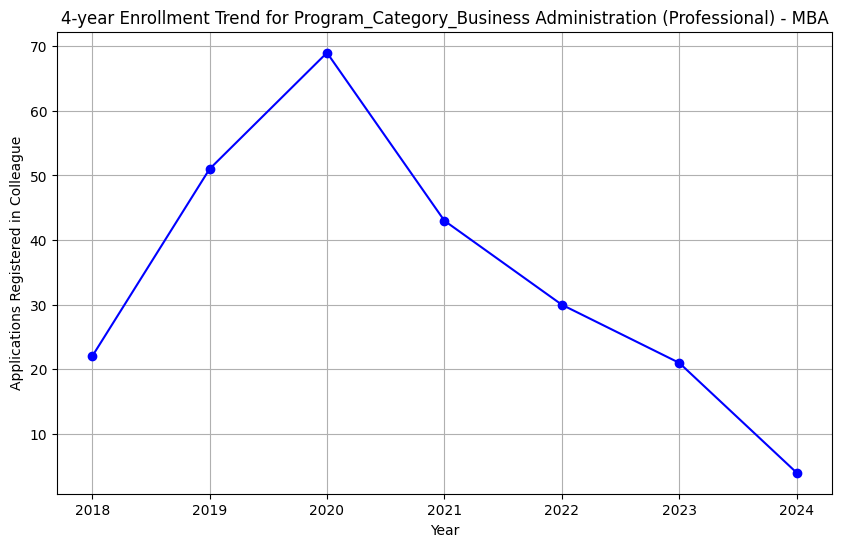

Predicted Enrollment for the Next Two Years:
2024    17.892857
2025    12.428571
dtype: float64


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data based on dummy column 'x'
filtered_df = df[df['Program_Category_Business Administration (Professional) - MBA'] == 1 & (df['Rec_year'] <= 2023)]

# Define the target variable
target_variable = 'Applications Registered in Colleague'

# 4-year enrollment trend
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('4-year Enrollment Trend for Program_Category_Business Administration (Professional) - MBA')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)
plt.show()

# Prediction for the next two years (using a simple linear trend model)
X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)

# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025]]), index=[2024, 2025])
print("Predicted Enrollment for the Next Two Years:")
print(next_two_years)

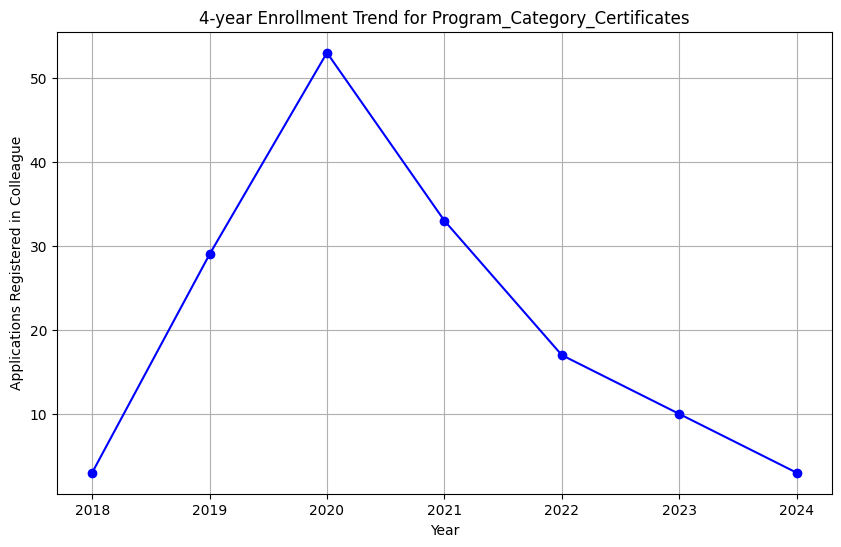

Predicted Enrollment for the Next Two Years:
2024    13.214286
2025    10.571429
dtype: float64


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data based on dummy column 'x'
filtered_df = df[df['Program_Category_Certificates'] == 1 & (df['Rec_year'] <= 2023)]

# Define the target variable
target_variable = 'Applications Registered in Colleague'

# 4-year enrollment trend
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('4-year Enrollment Trend for Program_Category_Certificates')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)
plt.show()

# Prediction for the next two years (using a simple linear trend model)
X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)

# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025]]), index=[2024, 2025])
print("Predicted Enrollment for the Next Two Years:")
print(next_two_years)

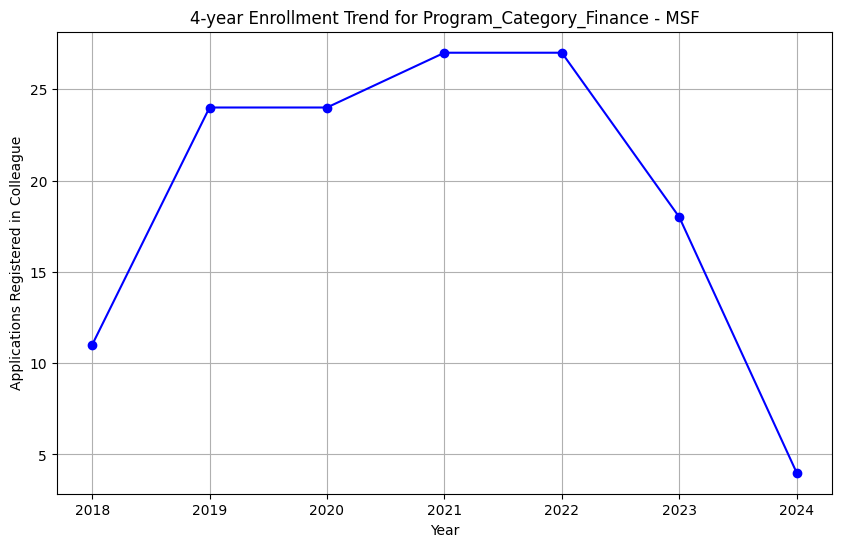

Predicted Enrollment for the Next Two Years:
2024    16.071429
2025    15.000000
dtype: float64


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data based on dummy column 'x'
filtered_df = df[df['Program_Category_Finance - MSF'] == 1 & (df['Rec_year'] <= 2023)]

# Define the target variable
target_variable = 'Applications Registered in Colleague'

# 4-year enrollment trend
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('4-year Enrollment Trend for Program_Category_Finance - MSF')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)
plt.show()

# Prediction for the next two years (using a simple linear trend model)
X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)

# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025]]), index=[2024, 2025])
print("Predicted Enrollment for the Next Two Years:")
print(next_two_years)

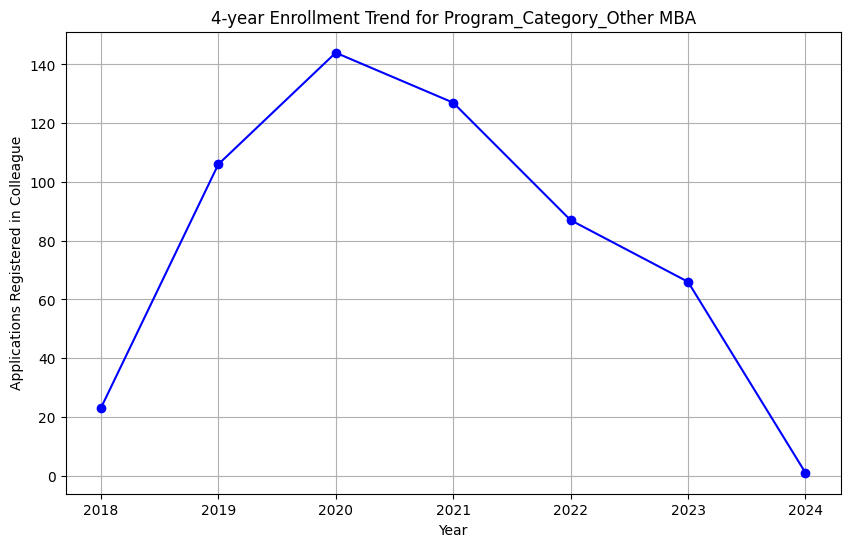

Predicted Enrollment for the Next Two Years:
2024    57.392857
2025    50.142857
dtype: float64


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data based on dummy column 'x'
filtered_df = df[df['Program_Category_Other MBA'] == 1 & (df['Rec_year'] <= 2023)]

# Define the target variable
target_variable = 'Applications Registered in Colleague'

# 4-year enrollment trend
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('4-year Enrollment Trend for Program_Category_Other MBA')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)
plt.show()

# Prediction for the next two years (using a simple linear trend model)
X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)

# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025]]), index=[2024, 2025])
print("Predicted Enrollment for the Next Two Years:")
print(next_two_years)

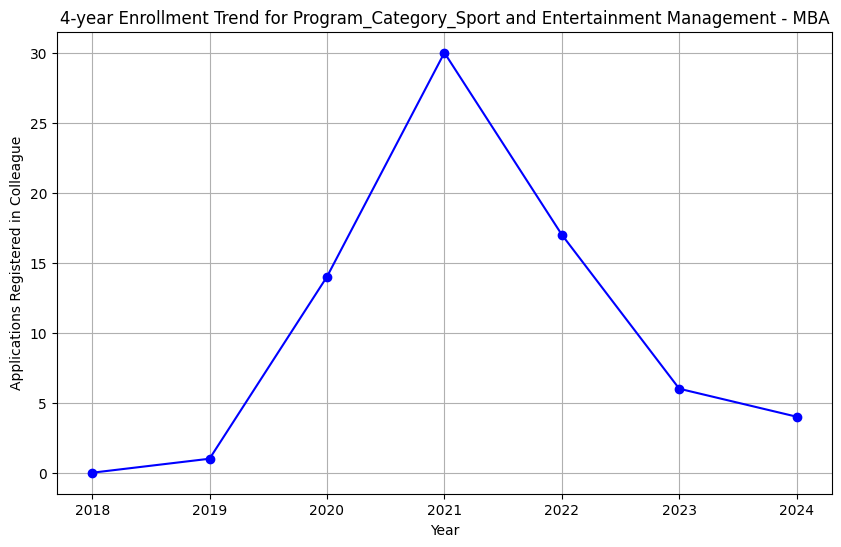

Predicted Enrollment for the Next Two Years:
2024    12.964286
2025    13.857143
dtype: float64


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data based on dummy column 'x'
filtered_df = df[df['Program_Category_Sport and Entertainment Management - MBA'] == 1 & (df['Rec_year'] <= 2023)]

# Define the target variable
target_variable = 'Applications Registered in Colleague'

# 4-year enrollment trend
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('4-year Enrollment Trend for Program_Category_Sport and Entertainment Management - MBA')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)
plt.show()

# Prediction for the next two years (using a simple linear trend model)
X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)

# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025]]), index=[2024, 2025])
print("Predicted Enrollment for the Next Two Years:")
print(next_two_years)

In [39]:
# Question 4: What are the current student profiles of students most likely to matriculate by program?
# Student profiles by program
program_profiles = {}
program_columns = [col for col in df.columns if col.startswith('Program_Category_')]

for program_col in program_columns:
    program_name = program_col.split('_')[-1]
    mean_profile = df.groupby(program_col).mean()[target_variable]
    program_profiles[program_name] = mean_profile.loc[1]  # Assuming 1 represents presence in the program

# Define relevant columns including demographic information, academic performance, and application status
relevant_columns = ['Age']
relevant_columns2 = ['Age']
relevant_columns += [col for col in df.columns if col.startswith('Race_') or col.startswith('Sex_') or col.startswith('Visa Type New_')or col.startswith('Region_')  or col.startswith('GPA_Category_')]

# Group by program and calculate the proportion of each category for relevant columns
program_characteristics = {}
for program_col in program_columns:
    program_name = program_col.split('_')[-1]
    program_data = df[df[program_col] == 1][relevant_columns].mean()  # Select rows where the program is present
    program_data1 = df[df[program_col] == 1][relevant_columns2].mean()
    max_race_category = program_data.filter(like='Race_Category_').idxmax().split('_')[-1]
    max_sex_category = program_data.filter(like='Sex_').idxmax().split('_')[-1]
    max_visa_type_category = program_data.filter(like='Visa Type New_').idxmax().split('_')[-1]
    max_Region_category = program_data.filter(like='Region_').idxmax().split('_')[-1]
    max_gpa_category = program_data.filter(like='GPA_Category_').idxmax().split('_')[-1]
    program_characteristics[program_name] = {
        'Characteristics': program_data1,
        'Max Race Category': max_race_category,
        'Max Sex Category': max_sex_category,
        'Max Visa Type Category': max_visa_type_category,
        'Max Region Category': max_Region_category,
        'MAX gpa category': max_gpa_category
    }

# Print characteristics of students most likely to matriculate by program
for program, data in program_characteristics.items():
    print(f"Program: {program}")
    print("Characteristics:")
    print(data['Characteristics'])
    print(f"Race Category: {data['Max Race Category']}")
    print(f"Sex Category: {data['Max Sex Category']}")
    print(f"Visa Type Category: {data['Max Visa Type Category']}")
    print(f"Resident of: {data['Max Region Category']}")
    print(f"GPA: {data['MAX gpa category']}")
    print()


Program: Accounting and Analytics - MS
Characteristics:
Age    29.237037
dtype: float64
Race Category: Asian
Sex Category: M
Visa Type Category: F-1  Student
Resident of: Other
GPA: equal to or greater than 3

Program: Business Administration (Professional) - MBA
Characteristics:
Age    30.979508
dtype: float64
Race Category: Asian
Sex Category: M
Visa Type Category: F-1  Student
Resident of: North America
GPA: equal to or greater than 3

Program: Business Analytics - MSBA
Characteristics:
Age    28.302284
dtype: float64
Race Category: Asian
Sex Category: M
Visa Type Category: F-1  Student
Resident of: Other
GPA: equal to or greater than 3

Program: Certificates
Characteristics:
Age    32.877761
dtype: float64
Race Category: Asian
Sex Category: M
Visa Type Category: Citizen
Resident of: North America
GPA: equal to or greater than 3

Program: Finance - MSF
Characteristics:
Age    28.040119
dtype: float64
Race Category: Asian
Sex Category: M
Visa Type Category: F-1  Student
Resident of: 

In [78]:
# Question 3: Which factors correlate (+/-) with whether an applicant will matriculate (other than country they apply from), Program wise? Logistic model
program_category_columns = df.filter(regex='^Program_Category_', axis=1).columns

# Loop through each program category
for category_column in program_category_columns:
    category_name = category_column.replace('Program_Category_', '')
    print("Program category:", category_name)
    
    # Filter data for the current program category
    df_category = df[df[category_column] == 1 & df['Rec_year']]
    
    # Define X (independent variables) and y (target variable)
    X = df_category.drop(['Applications Registered in Colleague', 'Application Created Date','Record Created Date', 'App_year'], axis=1)  # Exclude non-predictive columns
    y = df_category['Applications Registered in Colleague']  # Target variable
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    #print("Classification Report:")
    #print(classification_report(y_test, y_pred))
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

# Print precision, recall, and accuracy
    print("Precision:", precision)
    print("Recall:", recall)
    coefficients = model.coef_[0]
    significant_coefficients = []
    for feature, coef in zip(X.columns, coefficients):
     if abs(coef) > 0.7:
            # Determine the sign of the coefficient
            sign = '+' if coef > 0 else '-'
            # Append the tuple (feature, coefficient, sign) to the list
            significant_coefficients.append((feature, sign))
    
    print("Factors that correlate with whether an apllicant will matriculate:",significant_coefficients)

   

Program category: Accounting and Analytics - MS
Accuracy: 0.9844810863239574
Precision: 0.9745762711864406
Recall: 0.8984375
Factors that correlate with whether an apllicant will matriculate: [('Rec_year', '+'), ('Application Status_Awaiting Submission', '-'), ('Application Status_Decided', '+'), ('Application Start Term_Fall 2019', '+'), ('Application Start Term_Fall 2020', '+'), ('Application Start Term_Fall 2021', '+'), ('Application Start Term_Fall 2022', '+'), ('Application Start Term_Fall 2023', '+'), ('Application Start Term_Fall 2024', '-'), ('Application Start Term_Summer 2020', '+'), ('Application Start Term_Summer 2023', '+'), ('Application Start Term_Winter 2021', '+'), ('Application Start Term_Winter 2023', '+'), ('Decision Reason_Admit Declined', '-'), ('Decision Reason_Deposit - Not Required', '+'), ('Decision Reason_Deposit Paid', '+'), ('Decision Reason_Pending', '-'), ('Decision Reason_Update Term - Post Decision', '-')]
Program category: Business Administration (Prof

Program category: Accounting and Analytics - MS
Top Significant Predictors:
                                    Feature  Importance
84   Decision Reason_Deposit - Not Required    0.323946
1                                  Rec_year    0.051228
0                                       Age    0.040616
109                   Visa Type New_Citizen    0.039391
88                  Decision Reason_Pending    0.037296
16               Application Status_Decided    0.033267
7         Application Referral Source_Other    0.032696
72           Decision Reason_Admit Declined    0.032646
27                     Region_North America    0.032361
15   Application Status_Awaiting Submission    0.024522


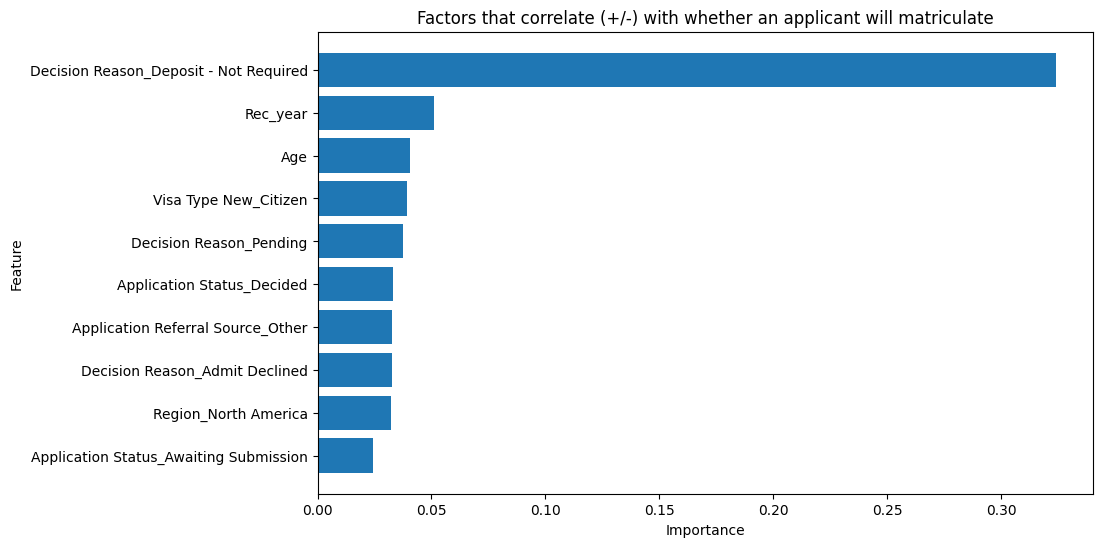

Accuracy: 0.9747817652764307
Precision: 0.9473684210526315
Recall: 0.84375
Program category: Business Administration (Professional) - MBA
Top Significant Predictors:
                                    Feature  Importance
84   Decision Reason_Deposit - Not Required    0.354080
1                                  Rec_year    0.043675
109                   Visa Type New_Citizen    0.041851
0                                       Age    0.040280
88                  Decision Reason_Pending    0.039071
16               Application Status_Decided    0.036624
72           Decision Reason_Admit Declined    0.029931
27                     Region_North America    0.025848
15   Application Status_Awaiting Submission    0.022244
7         Application Referral Source_Other    0.021670


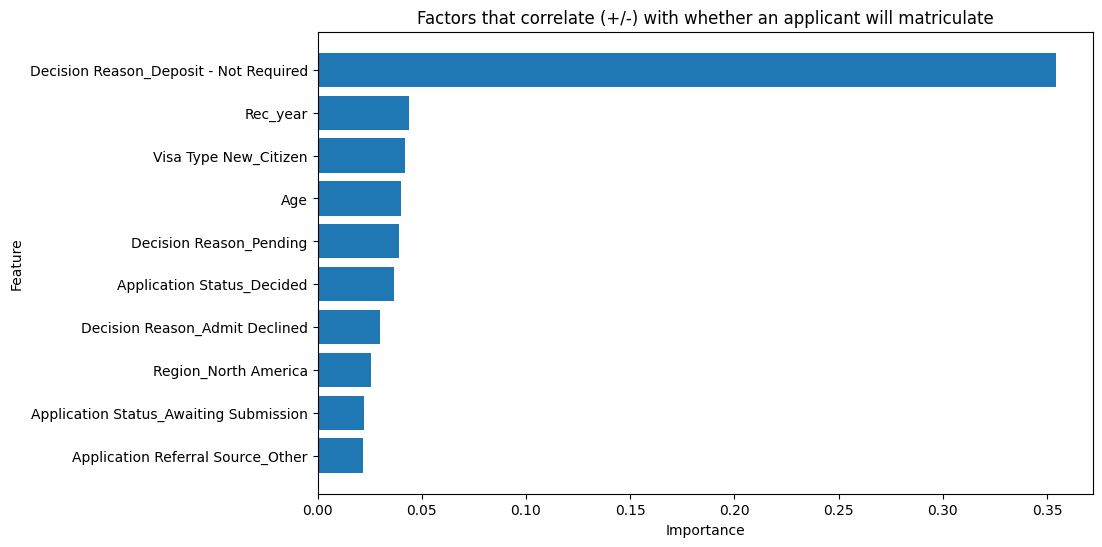

Accuracy: 0.9823874755381604
Precision: 0.9655172413793104
Recall: 0.8888888888888888
Program category: Business Analytics - MSBA
Top Significant Predictors:
                                    Feature  Importance
84   Decision Reason_Deposit - Not Required    0.322212
1                                  Rec_year    0.049919
0                                       Age    0.043362
16               Application Status_Decided    0.039037
88                  Decision Reason_Pending    0.035775
109                   Visa Type New_Citizen    0.034231
72           Decision Reason_Admit Declined    0.032784
27                     Region_North America    0.027857
15   Application Status_Awaiting Submission    0.027135
7         Application Referral Source_Other    0.026056


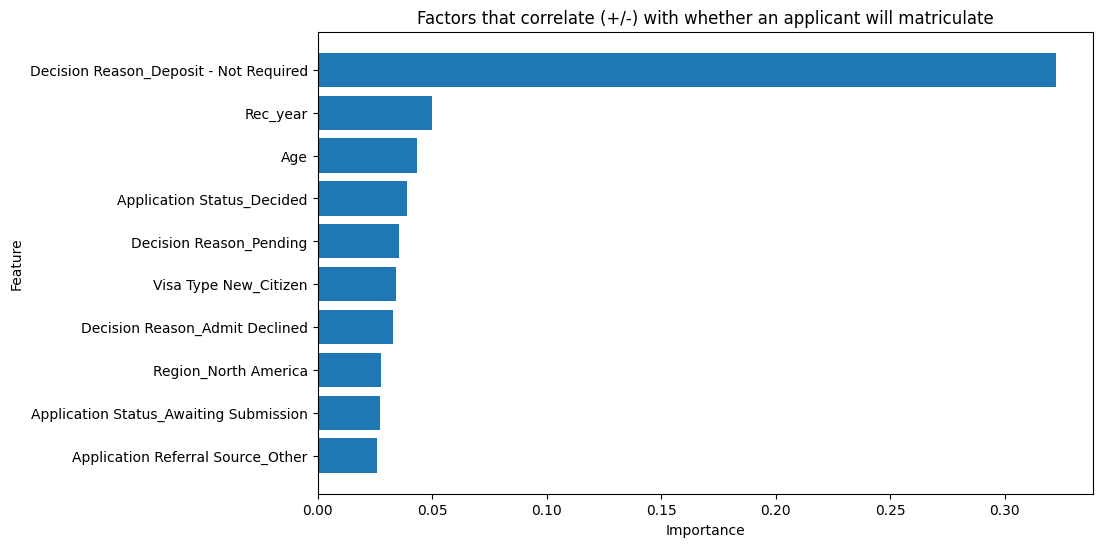

Accuracy: 0.980276134122288
Precision: 0.9558823529411765
Recall: 0.9027777777777778
Program category: Certificates
Top Significant Predictors:
                                    Feature  Importance
84   Decision Reason_Deposit - Not Required    0.317643
1                                  Rec_year    0.058512
0                                       Age    0.044524
16               Application Status_Decided    0.038881
109                   Visa Type New_Citizen    0.037319
27                     Region_North America    0.033282
88                  Decision Reason_Pending    0.032730
72           Decision Reason_Admit Declined    0.029478
7         Application Referral Source_Other    0.029264
15   Application Status_Awaiting Submission    0.024361


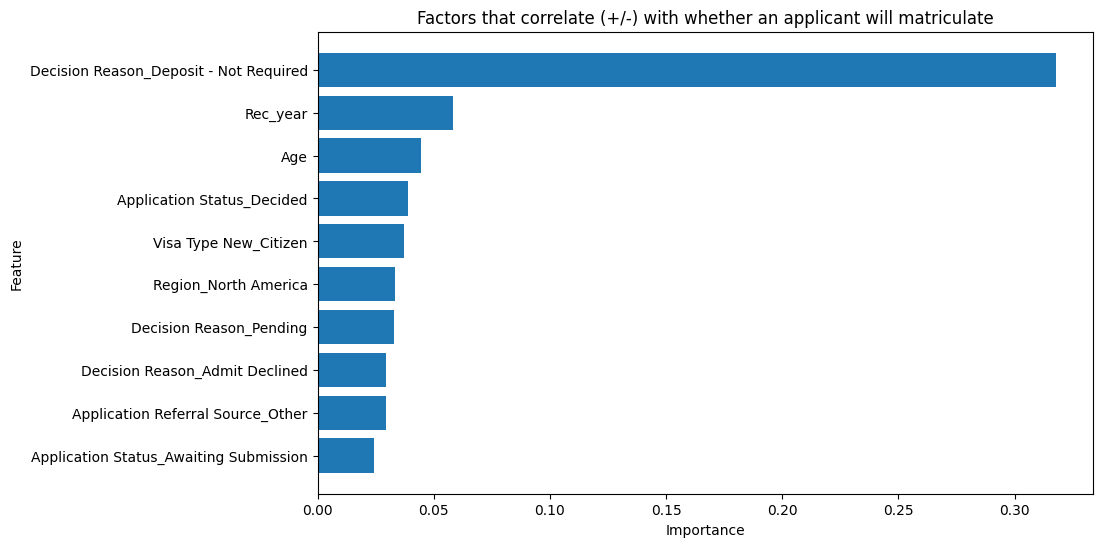

Accuracy: 0.9723593287265548
Precision: 0.9465648854961832
Recall: 0.8551724137931035
Program category: Finance - MSF
Top Significant Predictors:
                                    Feature  Importance
84   Decision Reason_Deposit - Not Required    0.347040
1                                  Rec_year    0.057265
16               Application Status_Decided    0.040828
0                                       Age    0.039886
109                   Visa Type New_Citizen    0.035519
88                  Decision Reason_Pending    0.031572
7         Application Referral Source_Other    0.030251
72           Decision Reason_Admit Declined    0.029182
27                     Region_North America    0.025958
15   Application Status_Awaiting Submission    0.023942


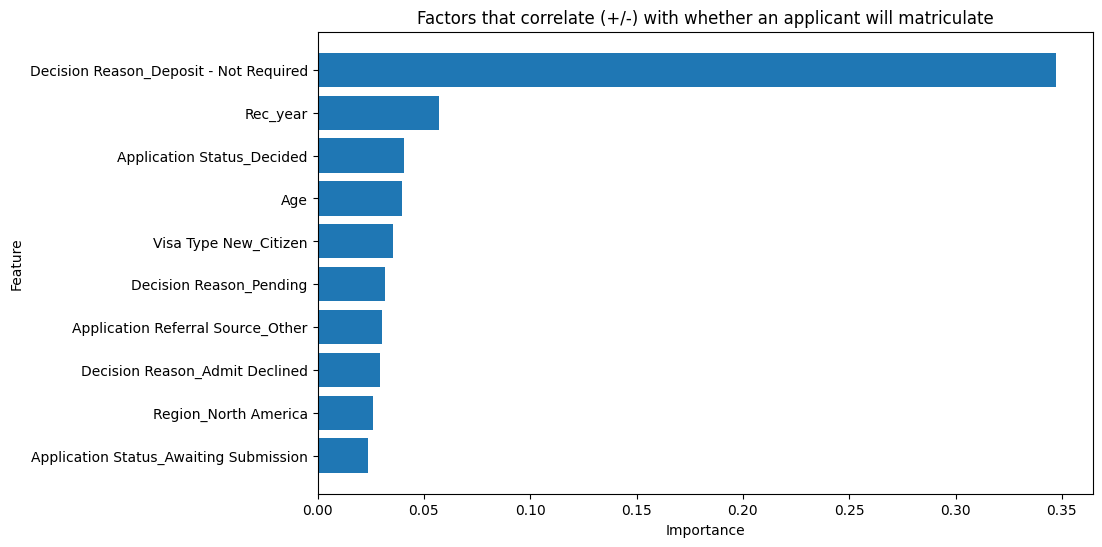

Accuracy: 0.9803343166175025
Precision: 0.9609375
Recall: 0.8913043478260869
Program category: Other MBA
Top Significant Predictors:
                                    Feature  Importance
84   Decision Reason_Deposit - Not Required    0.316797
1                                  Rec_year    0.047890
88                  Decision Reason_Pending    0.043362
109                   Visa Type New_Citizen    0.042893
16               Application Status_Decided    0.039358
0                                       Age    0.038597
27                     Region_North America    0.038306
72           Decision Reason_Admit Declined    0.035491
15   Application Status_Awaiting Submission    0.027965
7         Application Referral Source_Other    0.019502


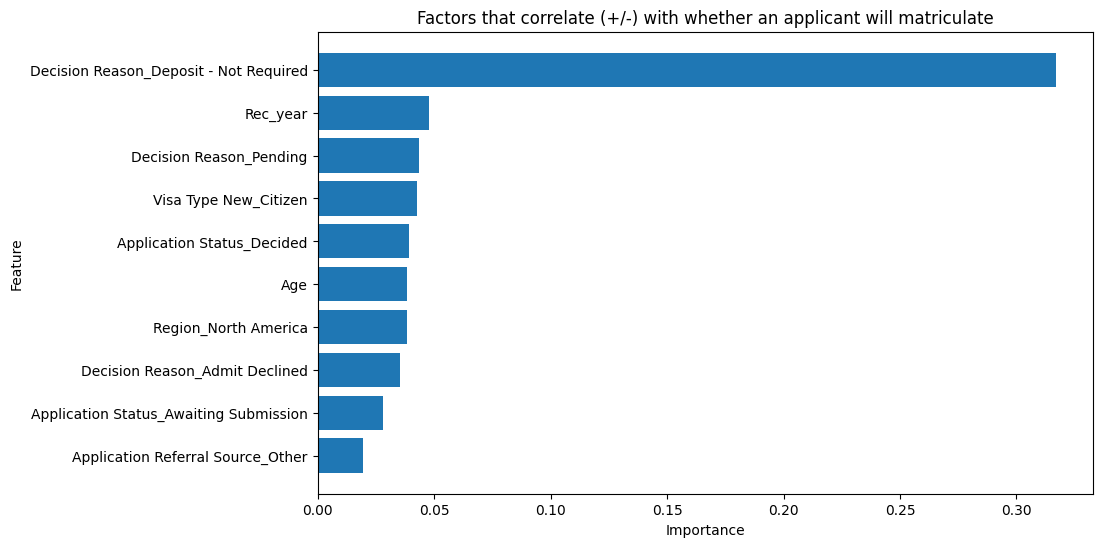

Accuracy: 0.9725490196078431
Precision: 0.9485294117647058
Recall: 0.86
Program category: Sport and Entertainment Management - MBA
Top Significant Predictors:
                                    Feature  Importance
84   Decision Reason_Deposit - Not Required    0.337255
1                                  Rec_year    0.050756
0                                       Age    0.040178
16               Application Status_Decided    0.037566
72           Decision Reason_Admit Declined    0.036743
109                   Visa Type New_Citizen    0.036474
88                  Decision Reason_Pending    0.033068
27                     Region_North America    0.028930
7         Application Referral Source_Other    0.026417
15   Application Status_Awaiting Submission    0.024739


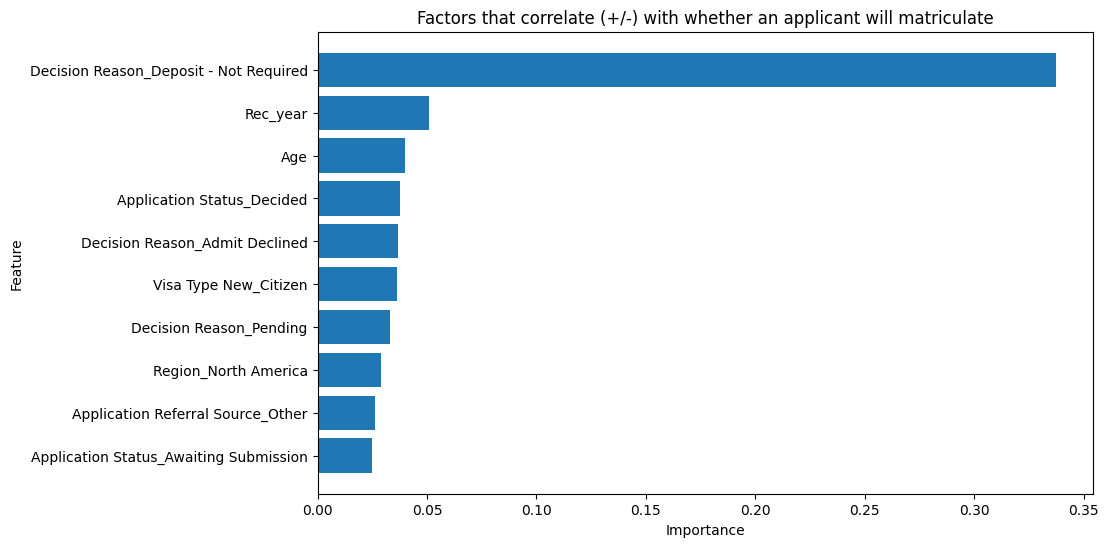

Accuracy: 0.9778206364513018
Precision: 0.9137931034482759
Recall: 0.8907563025210085


In [76]:
#Question 3: Which factors correlate (+/-) with whether an applicant will matriculate (other than country they apply from), Program wise? Random Forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

program_category_columns = df.filter(regex='^Program_Category_', axis=1).columns

# Loop through each program category
for category_column in program_category_columns:
    category_name = category_column.replace('Program_Category_', '')
    print("Program category:", category_name)
    
    # Filter data for the current program category
    df_category = df[df[category_column] == 1 & df['Rec_year']]
    
    # Define X (independent variables) and y (target variable)
    X = df_category.drop(['Applications Registered in Colleague', 'Application Created Date','Record Created Date', 'App_year'], axis=1)  # Exclude non-predictive columns
    y = df_category['Applications Registered in Colleague']  # Target variable
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Assuming 'X' and 'y' are your feature matrix and target variable
# Train the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

# Extract feature importances
    feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top significant predictors
    print("Top Significant Predictors:")
    print(importance_df.head(10))  # Adjust the number as needed

# Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Factors that correlate (+/-) with whether an applicant will matriculate')
    plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
    plt.show()
    y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
    precision = precision_score(y_test, y_pred)

# Calculate recall
    recall = recall_score(y_test, y_pred)

# Print the metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)

In [72]:
# Overall Logistic model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm



data = df.drop(columns=['Applications Registered in Colleague', 'Application Created Date']).copy()
X = data
y = df['Applications Registered in Colleague']

# Step 1: Standardize the features (optional but recommended for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print precision, recall, and accuracy
print("Precision:", precision)
print("Recall:", recall)
# Extract coefficients (weights) from the logistic regression model

coefficients = model.coef_[0]
significant_coefficients = []
for feature, coef in zip(X.columns, coefficients):
     if abs(coef) > 0.7:
            # Determine the sign of the coefficient
            sign = '+' if coef > 0 else '-'
            # Append the tuple (feature, coefficient, sign) to the list
            significant_coefficients.append((feature, sign))
    
print(significant_coefficients)


Accuracy: 0.9838630806845966
Precision: 0.937984496124031
Recall: 0.9343629343629344
[('App_year', '+'), ('Application Status_Awaiting Submission', '-'), ('Application Status_Decided', '+'), ('Application Start Term_Fall 2019', '+'), ('Application Start Term_Fall 2020', '+'), ('Application Start Term_Fall 2021', '+'), ('Application Start Term_Fall 2022', '+'), ('Application Start Term_Fall 2023', '+'), ('Application Start Term_Fall 2024', '-'), ('Application Start Term_Summer 2019', '+'), ('Application Start Term_Summer 2020', '+'), ('Application Start Term_Winter 2020', '+'), ('Application Start Term_Winter 2022', '+'), ('Decision Reason_Admit Declined', '-'), ('Decision Reason_Application Incomplete - Closed', '-'), ('Decision Reason_Deposit - Not Required', '+'), ('Decision Reason_Deposit Paid', '+'), ('Decision Reason_Pending', '-')]
